In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

mouse_data = os.path.join("C:\\Users\\mas34\\Downloads\\mouse_drug_data.csv")
clinical_data = os.path.join("C:\\Users\\mas34\\Downloads\\clinicaltrial_data.csv")

mouse_drug_df = pd.read_csv(mouse_data)
clinical_trial_df = pd.read_csv(clinical_data)

merged_df = pd.merge(clinical_trial_df,mouse_drug_df,on='Mouse ID',how='left')
merged_df 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,f932,0,45.000000,0,Ketapril
2,g107,0,45.000000,0,Ketapril
3,a457,0,45.000000,0,Ketapril
4,c819,0,45.000000,0,Ketapril
5,h246,0,45.000000,0,Ketapril
6,p189,0,45.000000,0,Ketapril
7,n923,0,45.000000,0,Ketapril
8,q119,0,45.000000,0,Ketapril
9,f993,0,45.000000,0,Naftisol


In [2]:
grouped = merged_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
avgtum = grouped.mean()

avgtumdf = avgtum.reset_index()

avgtumdf.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
tumstnderr = grouped.sem()

tumstnderrdf = pd.DataFrame(tumstnderr)

tumstnderrdf.reset_index(inplace=True)
tumstnderrdf.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
avg_tumor_df_chart = avgtumdf.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

avg_tumor_df_chart.head(20)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


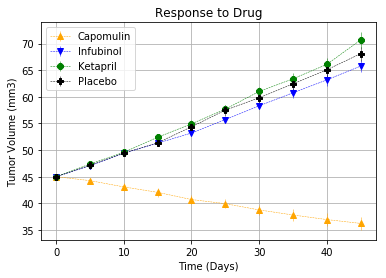

In [5]:
drug_format_list = [('Capomulin','^','orange'),('Infubinol','v','blue'),('Ketapril','8','green'),('Placebo','P','black')]
for drug,marker,colors in drug_format_list:
    ste = tumstnderr[drug]
    tumortreatmentplt = plt.errorbar(avg_tumor_df_chart.index,avg_tumor_df_chart[drug],ste,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)
plt.legend(loc='best')
plt.title('Response to Drug')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

plt.savefig(os.path.join('desktop','tumor_response_to_treatment.png'))

In [6]:
merged_met_df = merged_df.groupby(['Drug','Timepoint'])['Metastatic Sites']
avg_met_df = merged_met_df.mean()

avg_met_df = avg_met_df.reset_index()

avg_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
met_standard_errors = merged_met_df.sem()

met_standard_errors_df = pd.DataFrame(met_standard_errors)

met_standard_errors_df.reset_index(inplace=True)
met_standard_errors_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
avg_met_df_chart = avg_met_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

avg_met_df_chart.head(20)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


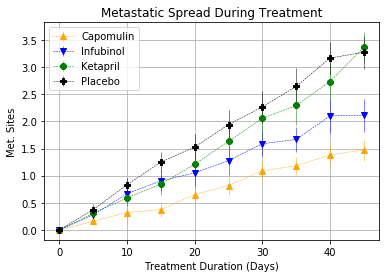

In [9]:
for drug,marker,colors in drug_format_list:
    ste = met_standard_errors[drug]
    mettreatmentplt = plt.errorbar(avg_met_df_chart.index,avg_met_df_chart[drug],ste,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)
    
plt.legend(loc='best')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid()

plt.savefig(os.path.join('desktop','metastic_spread_during_treatment.png'))

In [10]:
mouse_grouped_df = merged_df.groupby(['Drug','Timepoint'])['Mouse ID']
mouse_count_df = mouse_grouped_df.nunique()
mouse_count_df = pd.DataFrame(mouse_count_df)

mouse_count_df.reset_index(inplace=True)
mouse_count_df=mouse_count_df.rename(columns={'Mouse ID':'Mouse Count'})

mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
mouse_count_df_chart = mouse_count_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')

mouse_count_df_chart.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


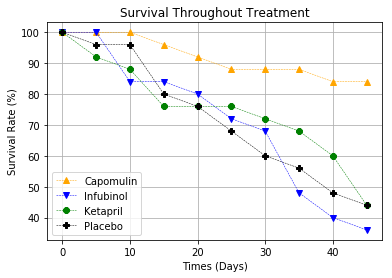

In [12]:
for drug,marker,colors in drug_format_list:
    total_mouse = mouse_count_df_chart[drug][0]
    survival_rate = (mouse_count_df_chart[drug]/total_mouse)*100
    survival_treatment_plt = plt.plot(mouse_count_df_chart.index,survival_rate,
                                       marker=marker,ls='--',color=colors,linewidth=0.5)

plt.legend(loc='best')
plt.title('Survival Throughout Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

plt.savefig(os.path.join('desktop','survival_during_treatment.png'))

In [13]:
changeinpercentage = (avg_tumor_df_chart.iloc[-1]/(avg_tumor_df_chart.iloc[0])-1)*100

changeinpercentage

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

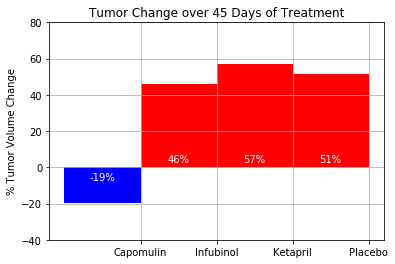

In [14]:
passing = changeinpercentage < 0

drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
change_list = [(changeinpercentage[durg])for durg in drug_list]
change_plt = plt.bar(drug_list,change_list,width=-1,align='edge',color=passing.map({True:'b',False:'r'}))
plt.grid()
plt.ylim(-40,80)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Days of Treatment')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
                
autolabel(change_plt)

plt.savefig(os.path.join('desktop','tumor_change_over_45day_treatment.png'))